In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,249 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

talk1 = pd.read_csv("/content/4.csv", encoding='cp949')
talk2 = pd.read_csv("/content/5.csv", encoding='cp949')
talk3 = pd.read_excel("/content/감성대화말뭉치(최종데이터)_Training.xlsx")
talk4 = pd.read_excel("/content/감성대화말뭉치(최종데이터)_Validation.xlsx")

In [2]:
talk1["From"] = "대화 음성 4차"
talk2["From"] = "대화 음성 5차"
talk3["From"] = "감성대화말뭉치_train"
talk4["From"] = "감성대화말뭉치_val"

In [3]:
corpus1 = pd.concat([talk1, talk2])
corpus2 = pd.concat([talk3, talk4])

In [4]:
corpus1.head()

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별,From
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male,대화 음성 4차
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male,대화 음성 4차
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male,대화 음성 4차
3,5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,Sadness,1,27,male,대화 음성 4차
4,5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,Sadness,1,32,male,대화 음성 4차


In [5]:
corpus1 = corpus1[["발화문", "1번 감정", "From"]]
corpus1

,발화문,1번 감정,From
0,"어, 청소 니가 대신 해 줘!",Neutral,대화 음성 4차
1,둘 다 청소 하기 싫어. 귀찮아.,Neutral,대화 음성 4차
2,둘 다 하기 싫어서 화내.,Angry,대화 음성 4차
3,그럼 방세는 어떡해.,Sadness,대화 음성 4차
4,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,Sadness,대화 음성 4차
...,...,...,...
10006,너의 말 대로 약속 장소를 옮겨 보는 것도 좋은 방법 같아. 나는 취소할 생각만 했...,Neutral,대화 음성 5차
10007,산책하는 게 나을 것 같아. 이제부터 산책 좀 해볼게.,Neutral,대화 음성 5차
10008,너의 말을 듣고보니까 약속장소를 옮겨보는 것도 좋은 방법 같아.,Neutral,대화 음성 5차
10009,오늘 친구한테 전화해서 안좋은 상황이니까 약속을 미룰지 약속 장소를 변경할지 상의해...,Neutral,대화 음성 5차


In [6]:
corpus2.head()

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4,From
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN,감성대화말뭉치_train
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN,감성대화말뭉치_train
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.,감성대화말뭉치_train
3,31303,노년,남성,재정,만성질환 무,기쁨,신이 난,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 후 첫 월급이라 정말 기쁘시겠어요.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,이 기분을 유지하려면 어떻게 해야 할까요?,회사생활을 열심히 해서 계속 월급을 받을거야!,계속 원하시는 대로 회사생활이 이어지길 바랄게요.,NaN,NaN,감성대화말뭉치_train
4,47200,노년,여성,재정,만성질환 유,기쁨,안도,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶으시군요.,NaN,NaN,NaN,NaN,감성대화말뭉치_train


In [7]:
corpus2 = corpus2.loc[:, ['감정_대분류', '사람문장1', 'From']]
corpus2

,감정_대분류,사람문장1,From
0,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나.,감성대화말뭉치_train
1,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,감성대화말뭉치_train
2,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,감성대화말뭉치_train
3,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,감성대화말뭉치_train
4,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,감성대화말뭉치_train
...,...,...,...
5125,기쁨,부동산 임대 소득으로 현재 여유롭게 살 수 있어서 좋단다.,감성대화말뭉치_val
5126,불안,폐결핵은 이미 완치된 것 같은데 약을 한 달이나 더 먹으라고 하네? 아직 안 나은 ...,감성대화말뭉치_val
5127,분노,연애하고 싶은데 소개팅만 나가면 꽝이야. 이러다가 난 결혼 못 하고 늙어 죽을 거야.,감성대화말뭉치_val
5128,분노,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.,감성대화말뭉치_val


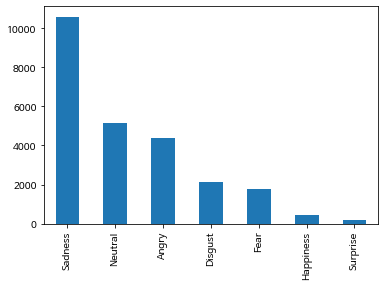

In [8]:
corpus1["1번 감정"].value_counts().plot(kind="bar")

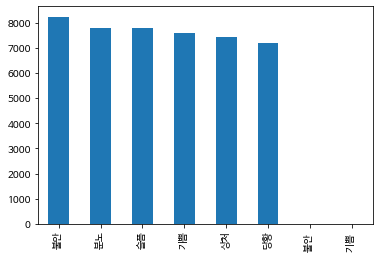

In [9]:
corpus2["감정_대분류"].value_counts().plot(kind="bar")

In [10]:
corpus2["감정_대분류"].value_counts()

불안     8235
분노     7793
슬픔     7776
기쁨     7571
상처     7440
당황     7192
불안        1
기쁨        1
Name: 감정_대분류, dtype: int64

In [11]:
corpus1.columns=["Sentence", "Emotion", 'From']
corpus1.head()

,Sentence,Emotion,From
0,"어, 청소 니가 대신 해 줘!",Neutral,대화 음성 4차
1,둘 다 청소 하기 싫어. 귀찮아.,Neutral,대화 음성 4차
2,둘 다 하기 싫어서 화내.,Angry,대화 음성 4차
3,그럼 방세는 어떡해.,Sadness,대화 음성 4차
4,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,Sadness,대화 음성 4차


In [12]:
corpus2 = corpus2[["사람문장1", "감정_대분류", "From"]]
corpus2.columns = ["Sentence", "Emotion", 'From']
corpus2.head()

,Sentence,Emotion,From
0,아내가 드디어 출산하게 되어서 정말 신이 나.,기쁨,감성대화말뭉치_train
1,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,불안,감성대화말뭉치_train
2,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,당황,감성대화말뭉치_train
3,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,기쁨,감성대화말뭉치_train
4,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기쁨,감성대화말뭉치_train


In [13]:
corpus2[corpus2["Emotion"] == "불안 "]

,Sentence,Emotion,From
34527,오 대리가 자기 잘못을 끝까지 인정하지 않아서 더 이상 말 섞기가 싫어.,불안,감성대화말뭉치_train


In [14]:
corpus2[corpus2["Emotion"] == "기쁨 "]

,Sentence,Emotion,From
35511,혈당이 많이 내려갔어! 정말 기뻐.,기쁨,감성대화말뭉치_train


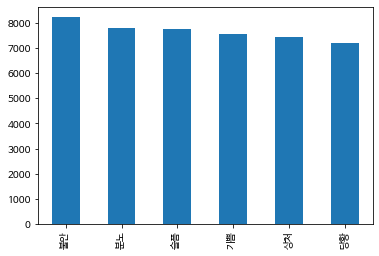

In [15]:
corpus2.loc[corpus2["Emotion"] == "불안 ", "Emotion"] = "불안"
corpus2.loc[corpus2["Emotion"] == "기쁨 ", "Emotion"] = "기쁨"

corpus2["Emotion"].value_counts().plot(kind="bar")

In [16]:
corpus1.replace("Fear", "불안", inplace=True)
corpus1.replace("Neutral", "중립", inplace=True)
corpus1.replace("Surprise", "놀람", inplace=True)
corpus1.replace("Happiness", "행복", inplace=True)
corpus1.replace("Sadness", "슬픔", inplace=True)
corpus1.replace("Disgust", "혐오", inplace=True)
corpus1.replace("Angry", "분노", inplace=True)

corpus1.head()

,Sentence,Emotion,From
0,"어, 청소 니가 대신 해 줘!",중립,대화 음성 4차
1,둘 다 청소 하기 싫어. 귀찮아.,중립,대화 음성 4차
2,둘 다 하기 싫어서 화내.,분노,대화 음성 4차
3,그럼 방세는 어떡해.,슬픔,대화 음성 4차
4,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,슬픔,대화 음성 4차


In [17]:
corpus2.replace("기쁨", "행복", inplace=True)
corpus2.replace("상처", "슬픔", inplace=True)
corpus2.replace("당황", "놀람", inplace=True)

corpus2

,Sentence,Emotion,From
0,아내가 드디어 출산하게 되어서 정말 신이 나.,행복,감성대화말뭉치_train
1,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,불안,감성대화말뭉치_train
2,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,놀람,감성대화말뭉치_train
3,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,행복,감성대화말뭉치_train
4,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,행복,감성대화말뭉치_train
...,...,...,...
5125,부동산 임대 소득으로 현재 여유롭게 살 수 있어서 좋단다.,행복,감성대화말뭉치_val
5126,폐결핵은 이미 완치된 것 같은데 약을 한 달이나 더 먹으라고 하네? 아직 안 나은 ...,불안,감성대화말뭉치_val
5127,연애하고 싶은데 소개팅만 나가면 꽝이야. 이러다가 난 결혼 못 하고 늙어 죽을 거야.,분노,감성대화말뭉치_val
5128,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.,분노,감성대화말뭉치_val


In [18]:
corpus = pd.concat([corpus1, corpus2])
corpus

,Sentence,Emotion,From
0,"어, 청소 니가 대신 해 줘!",중립,대화 음성 4차
1,둘 다 청소 하기 싫어. 귀찮아.,중립,대화 음성 4차
2,둘 다 하기 싫어서 화내.,분노,대화 음성 4차
3,그럼 방세는 어떡해.,슬픔,대화 음성 4차
4,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,슬픔,대화 음성 4차
...,...,...,...
5125,부동산 임대 소득으로 현재 여유롭게 살 수 있어서 좋단다.,행복,감성대화말뭉치_val
5126,폐결핵은 이미 완치된 것 같은데 약을 한 달이나 더 먹으라고 하네? 아직 안 나은 ...,불안,감성대화말뭉치_val
5127,연애하고 싶은데 소개팅만 나가면 꽝이야. 이러다가 난 결혼 못 하고 늙어 죽을 거야.,분노,감성대화말뭉치_val
5128,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.,분노,감성대화말뭉치_val


In [20]:
data = pd.read_csv('/content/sentiment_data.csv')
data.replace("공포", "불안", inplace=True)
data

,Unnamed: 0,Sentence,Emotion,From
0,0,언니 동생으로 부르는게 맞는 일인가요..??,불안,단발성 대화
1,1,그냥 내 느낌일뿐겠지?,불안,단발성 대화
2,2,아직너무초기라서 그런거죠?,불안,단발성 대화
3,3,유치원버스 사고 낫다던데,불안,단발성 대화
4,4,근데 원래이런거맞나요,불안,단발성 대화
...,...,...,...,...
105828,113591,얘긴 다 끝났냐? 원예부,중립,연속성 대화
105829,113592,"예. 그거 때문에, 부탁이 있......는......데요.",중립,연속성 대화
105830,113593,여자 숨겨달라는거면 사절이다.,중립,연속성 대화
105831,113594,아무래도 안되나요?,중립,연속성 대화


In [21]:
sentiment_data_plus = pd.concat([data, corpus])
sentiment_data_plus

,Unnamed: 0,Sentence,Emotion,From
0,0.0,언니 동생으로 부르는게 맞는 일인가요..??,불안,단발성 대화
1,1.0,그냥 내 느낌일뿐겠지?,불안,단발성 대화
2,2.0,아직너무초기라서 그런거죠?,불안,단발성 대화
3,3.0,유치원버스 사고 낫다던데,불안,단발성 대화
4,4.0,근데 원래이런거맞나요,불안,단발성 대화
...,...,...,...,...
5125,NaN,부동산 임대 소득으로 현재 여유롭게 살 수 있어서 좋단다.,행복,감성대화말뭉치_val
5126,NaN,폐결핵은 이미 완치된 것 같은데 약을 한 달이나 더 먹으라고 하네? 아직 안 나은 ...,불안,감성대화말뭉치_val
5127,NaN,연애하고 싶은데 소개팅만 나가면 꽝이야. 이러다가 난 결혼 못 하고 늙어 죽을 거야.,분노,감성대화말뭉치_val
5128,NaN,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.,분노,감성대화말뭉치_val


In [22]:
sentiment_data_plus['Emotion'].value_counts()

중립    53402
슬픔    35137
분노    24276
행복    18641
놀람    18596
불안    16704
혐오     9703
Name: Emotion, dtype: int64

In [23]:
sentiment_data_plus.isnull().sum()

Unnamed: 0    70626
Sentence          0
Emotion           0
From              0
dtype: int64

In [25]:
sentiment_data_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176459 entries, 0 to 5129
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  105833 non-null  float64
 1   Sentence    176459 non-null  object 
 2   Emotion     176459 non-null  object 
 3   From        176459 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.7+ MB


In [26]:
sentiment_data_plus.duplicated(['Sentence']).sum()

5406

In [27]:
sentiment_plus = sentiment_data_plus.drop_duplicates(subset=['Sentence'])
sentiment_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171053 entries, 0 to 5129
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  105833 non-null  float64
 1   Sentence    171053 non-null  object 
 2   Emotion     171053 non-null  object 
 3   From        171053 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.5+ MB


In [28]:
sentiment_plus.to_csv("sentiment_data_plus.csv", encoding="utf-8-sig")

In [1]:
import pandas as pd

data = pd.read_csv('/content/sentiment_data_plus.csv')
data.to_csv('sentiment.tsv', sep="\t")